In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train, test = pd.read_csv('train.csv'), pd.read_csv('test.csv')

y = train['SalePrice']
train.drop('SalePrice', inplace=True, axis=1)

# # checking if the order of columns are the same
# print("Same number and order of columns for train and test:", list(train.columns) == list(test.columns))
# print('======================================================')

# # checking if number of object columns are the same
# print(
#     "Same number and order of 'object' columns :",
#     list(train.select_dtypes(include='object').columns) == list(test.select_dtypes(include='object'))
# )
#
# print('======================================================')


# # dropping these 5 columns
# train.drop([
#     'PoolQC',
#     'MiscFeature',
#     'Alley',
#     'Fence',
#     'FireplaceQu'
# ], inplace=True, axis=1)
#
# test.drop([
#     'PoolQC',
#     'MiscFeature',
#     'Alley',
#     'Fence',
#     'FireplaceQu'
# ], inplace=True, axis=1)

# joining test and train datasets
# combining train and test data into a single df

df = pd.concat([train, test], axis=0)

# # checking the shape and dtypes of the resulting dataframe
# print(df.shape)
# print("========================================")
# print(df.dtypes.value_counts())
# print("========================================")
# df.head()

# converting this column from numeric to object

df['MSSubClass'] = df['MSSubClass'].astype('object', copy=False)

# converting somem object columns into numeric on the basis of conditions/qualities etc.
# converting some NaN in numeric columns to 0

cols_to_replace = [
    'Street',
    'Alley',
    'LotShape',
    'LandContour',
    'Utilities',
    'LandSlope',
    'ExterQual',
    'ExterCond',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'HeatingQC',
    'CentralAir',
    'Electrical',
    'KitchenQual',
    'Functional',
    'FireplaceQu',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
    'PoolQC',
    'GarageType',
    'MiscFeature',
    'MasVnrType',
    'GarageYrBlt',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'Fence',
    'GarageArea',
    'GarageCars',
    'BsmtHalfBath',
    'BsmtFullBath'
]

dict_to_replace_with = {
    'Street' : {
        'Pave' : 2,
        'Grvl' : 1
    },

    'Alley' : {
        'Pave' : 2,
        'Grvl' : 1,
        np.nan : 0
    },

    'LotShape' : {
        'Reg' : 3,
        'IR1' : 2,
        'IR2' : 1,
        'IR3' : 0
    },

    'LandContour' : {
        'Lvl' : 3,
        'Bnk' : 2,
        'HLS' : 1,
        'Low' : 0,
    },

    'Utilities' : {
        'AllPub' : 4,
        'NoSewr' : 3,
        'NoSeWa' : 2,
        'ELO' : 1,
        np.nan : 0
    },

    'LandSlope' : {
        'Gtl' : 2,
        'Mod' : 1,
        'Sev' : 0
    },

    'ExterQual' : {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1
    },

    'ExterCond' : {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1
    },

    'BsmtQual' : {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1,
        np.nan : 0
    },

    'BsmtCond' : {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1,
        np.nan : 0
    },

    'BsmtExposure' : {
        'Gd' : 4,
        'Av' : 3,
        'Mn' : 2,
        'No' : 1,
        np.nan : 0
    },

    'BsmtFinType1' : {
        'GLQ' : 6,
        'ALQ' : 5,
        'BLQ' : 4,
        'Rec' : 3,
        'LwQ' : 2,
        'Unf' : 1,
        np.nan : 0
    },

    'BsmtFinType2' : {
        'GLQ' : 6,
        'ALQ' : 5,
        'BLQ' : 4,
        'Rec' : 3,
        'LwQ' : 2,
        'Unf' : 1,
        np.nan : 0
    },

    'HeatingQC' : {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1,
        np.nan : 0
    },

    'CentralAir' : {
        'N' : 0,
        'Y' : 1
    },

    'Electrical' : {
        'SBrkr' : 5,
        'FuseA' : 4,
        'FuseF' : 3,
        'FuseP' : 2,
        'Mix' : 1,
        np.nan : 0
    },

    'KitchenQual' : {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1,
        np.nan : 0
    },

    'Functional' : {
        'Typ' : 8,
        'Min1' : 7,
        'Min2' : 6,
        'Mod' : 5,
        'Maj1' : 4,
        'Maj2' : 3,
        'Sev' : 2,
        'Sal' : 1,
        np.nan : 0
    },

    'FireplaceQu' : {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1,
        np.nan : 0
    },

    'GarageFinish' : {
        'Fin' : 3,
        'RFn' : 2,
        'Unf' : 1,
        np.nan : 0
    },

    'GarageQual' : {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1,
        np.nan : 0
    },

    'GarageCond' : {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1,
        np.nan : 0
    },

    'PavedDrive' : {
        'Y' : 2,
        'P' : 1,
        'N' : 0
    },

    'PoolQC' : {
        'Ex' : 4,
        'Gd' : 3,
        'TA' : 2,
        'Fa' : 1,
        np.nan : 0
    },

    'Fence' : {
        'GdPrv' : 2,
        'MnPrv' : 1,
        'GdWo' : 2,
        'MnWw' : 1,
        np.nan : 0
    },

    'GarageType' : {
        np.nan : 'NoGarage'
    },

    'MiscFeature' : {
        np.nan : 'NoFeature'
    },

    'MasVnrType' : {
        np.nan : 'NoVeneer'
    },

    'GarageYrBlt' : {
        np.nan : 0,
        2207 : 2007
    },

    'MasVnrArea' : {
        np.nan : 0
    },

    'BsmtFinSF1' : {
        np.nan : 0
    },

    'BsmtFinSF2' : {
        np.nan : 0
    },

    'BsmtUnfSF' : {
        np.nan : 0
    },

    'TotalBsmtSF' : {
        np.nan : 0
    },

    'BsmtFullBath' : {
        np.nan : 0
    },

    'BsmtHalfBath' : {
        np.nan : 0
    },

    'GarageArea' : {
        np.nan : 0
    },

    'GarageCars' : {
        np.nan : 0
    }

}

for i in cols_to_replace:
    df[i].replace(to_replace=dict_to_replace_with[i], inplace=True)

# selecting 'object' and 'numeric' columns with NaN values

nan_obj_cols = list(df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()])
nan_num_cols = list(df.select_dtypes(exclude='object').columns[df.select_dtypes(exclude='object').isnull().any()])

# # checking number of NaN values in object column
# df.isnull().sum().sort_values(ascending=False)

# filling all object NaN columns with mode

for i in nan_obj_cols:
    df[i].fillna(df[i].value_counts().index[0], inplace=True)

# # checking for any 'object' column with NaN values
# print(list(df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()]))

# doing this https://stackoverflow.com/questions/71317197/find-the-ferquency-of-values-within-an-interval-in-pandas-dataframe-column

bins = pd.interval_range(df['LotFrontage'].min(), df['LotFrontage'].max(), freq=10)

counts = pd.cut(df['LotFrontage'], bins).value_counts(normalize=True)

temp = pd.Series(counts.values, index=bins.mid).to_dict()

# filling NaN values in 'LotFrontage' column with temp.keys() in the ratio of temp.values()
df['LotFrontage'].fillna(pd.Series(
    np.random.choice(list(temp.keys()), p=list(temp.values()), size=len(df['LotFrontage']),)), inplace=True)

# DATA CLEANED AND NaN Values Taken care of
print('NaN values : ', df.isnull().sum().sum())
df.dtypes.value_counts()

df_obj_cols = df.select_dtypes(include='object').columns

# for i in df_obj_cols:
#     print(i)
#     plt.scatter(df[i][:1460], y)
#     plt.show()

NaN values :  0


In [37]:
# categorical encoding
for i in df_obj_cols:
    temp = pd.get_dummies(df[i], drop_first=True, prefix=i, prefix_sep='_')
    df.drop(i, inplace=True, axis=1)
    df = pd.concat([df, temp], axis=1)

# droping 'Id' column
df.drop('Id', inplace=True, axis=1)
df

C:\Users\jithin_d_mathew\anaconda3\envs\datapy\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2,0.0,3,3,4.0,2,7,5,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,2,0.0,3,3,4.0,2,6,8,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2,0.0,2,3,4.0,2,7,5,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,2,0.0,2,3,4.0,2,7,5,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2,0.0,2,3,4.0,2,8,5,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,2,0.0,3,3,4.0,2,4,7,...,0,0,0,0,1,0,0,0,1,0
1455,21.0,1894,2,0.0,3,3,4.0,2,4,5,...,0,0,0,0,1,0,0,0,0,0
1456,160.0,20000,2,0.0,3,3,4.0,2,5,7,...,0,0,0,0,1,0,0,0,0,0
1457,62.0,10441,2,0.0,3,3,4.0,2,5,5,...,0,0,0,0,1,0,0,0,1,0


In [38]:
# splitting train and test data
train = df.iloc[:1460, :]
test = df.iloc[1460:, :]

train.shape, test.shape

((1460, 211), (1459, 211))

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.1)

In [40]:
# CROSS VALIDATION HYPERPARAMETER TUNING XGBREGRESSOR

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=23)
regressor.fit(scaler.fit_transform(x_train), y_train)

print(mean_squared_log_error(y_test, regressor.predict(scaler.transform(x_test))))

ans = pd.read_csv('sample_submission.csv')

ans['SalePrice'] = regressor.predict(scaler.transform(test))

ans.to_csv('ans.csv', index=False)

0.02397885741524975

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(random_state=42)
regressor.fit(scaler.fit_transform(x_train), y_train)

print(mean_squared_log_error(y_test, regressor.predict(scaler.transform(x_test))))

ans = pd.read_csv('sample_submission.csv')

ans['SalePrice'] = regressor.predict(scaler.transform(test))

ans.to_csv('ans.csv', index=False)

0.01897031658778389


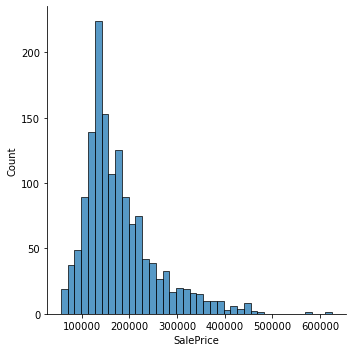

In [45]:
sns.displot(
    ans['SalePrice']
)

In [43]:
# Entries
### first --> 2570
### second -->
### third --> 2434
### third --> 2305
### forth --> 1548